In [28]:
import numpy as np
import gym
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [34]:
env = gym.make('FrozenLake8x8-v0')

In [35]:
actions = env.action_space.n
states = env.env.nS
grid = np.sqrt(states).astype('int32')

In [36]:
def value_interation(env, discount_factor = 0.999, theta = 0.00001):
    
    def actions_values(state, V):
        
        A = np.zeros(actions)
        for a in range(actions):
            for prob, next_state, reward, done in env.env.P[state][a]:
                A[a] += prob * (reward + (discount_factor * V[next_state]))
                
        return A
        
    V = np.zeros(states)
    store_arrays = []
    inter = 0
    
    while True:
        
        delta = 0
        for s in range(states):
            
            A = actions_values(s, V)
            max_value = np.max(A)
            
            delta = max(delta, np.abs(max_value - V[s]))
            V[s] = max_value
            
            if inter % 500 == 0:
                store_arrays.append(V.copy())           
            inter += 1
            
        if delta < theta:
            break
    
    print(inter)
    policy = np.zeros((states, actions))
    for s in range(states):
        
        A = actions_values(s, V)
        best_action = np.argmax(A)
        
        policy[s, best_action] = 1
        
    
    return V, policy, store_arrays

In [37]:
V, policy,store_arrays = value_interation(env)

3904


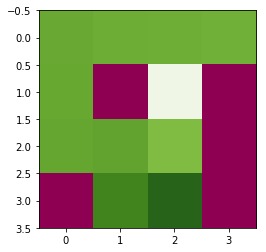

In [38]:
for i in store_arrays:
    time.sleep(0.1)
    clear_output(True)
    plt.imshow(i.reshape((grid,grid)), cmap = 'PiYG')
    plt.show()

In [14]:
def run_episode(env, policy, render = False):
    obs = env.reset()
    total_reward = 0
    while True:
        if render:
            env.render()
        best_action = np.argmax(policy[obs])
        obs, reward, done , _ = env.step(best_action)
        total_reward += reward
        if done:
            break
    return total_reward

In [15]:
run_episode(env, policy,render=True)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


1.0